In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/varnika/Desktop/DS219/student+performance/student/student-mat.csv', sep = ';')

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### the columns were stuck together in one column, I separated the columns by using sep function ;

In [7]:
df.info() # to check if any of the fields have missing values (systematically or randomlly? )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- The data is clean, non-null values 
- There are 33 columns and 395 observations 
- There are 17 categorical variables and 16 numerical that the python recognizes 

In [8]:
df_student = pd.read_csv('/Users/varnika/Desktop/DS219/student+performance/student/student-por.csv', sep = ';')

In [9]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

- I will use df_student to analyze because there are 649 observations and it will have better accuracy  

- Data Cleaning --> what columns do I need to answer the question: 

- How does the weekly study time (studytime) affect student performance between schools?
    - investigating whether students who study more perform better on average. 

## columns I need: 
- studytime (weekly study time) --> (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- G1 (first period grade) --> int
- G2 (second period grade) --> int
- G3 (final grade) --> int
- school (student's school) --> categorical 
- absences (number of school absences) --> int
- failures (past class failures) --> numerical --> can be dummy coded? because of scaling issues 
- schoolsup (extra educational support) --> categorical
- famsup (family educational support) --> categorical
- internet (Internet access at home)--> categorical
- higher (aspiration for higher education) --> categorical
- health (current health status) --> numerical --> can be dummy coded? because of scaling issues 

In [11]:
print(df_student['school'].unique()) # to see what all is included 

['GP' 'MS']


In [12]:
print(df_student['studytime'].unique())

[2 3 1 4]


In [13]:
## we will drop the rest of the columns 

In [14]:
columns_to_keep = ['studytime', 'G1', 'G2', 'G3', 'school', 'absences', 
                   'failures', 'schoolsup', 'famsup', 'internet', 'higher', 'health']
df_cleaned = df[columns_to_keep]
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [15]:
df_cleaned.head()

,studytime,G1,G2,G3,school,absences,failures,schoolsup,famsup,internet,higher,health
0,2,5,6,6,GP,6,0,yes,no,no,yes,3
1,2,5,5,6,GP,4,0,no,yes,yes,yes,3
2,2,7,8,10,GP,10,3,yes,no,yes,yes,3
3,3,15,14,15,GP,2,0,no,yes,yes,yes,5
4,2,6,10,10,GP,4,0,no,yes,no,yes,5


In [16]:
## I will work on the df_cleaned file

In [17]:
## to find the correlation of these variables, we need to first make it metric, so we will convert yes and no into 0 s and 1 s

In [28]:
# Convert 'yes' to 1 and 'no' to 0 so that its not categorical
yes_no_columns = ['schoolsup','famsup', 'internet', 'higher', 'health']
df_cleaned[yes_no_columns] = df_cleaned[yes_no_columns].replace({'yes': 1, 'no': 0})


/var/folders/gw/xg9wcgln7x1f2k7qpz6vkm_c0000gn/T/ipykernel_3490/2464131040.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[yes_no_columns] = df_cleaned[yes_no_columns].replace({'yes': 1, 'no': 0})


In [29]:
df_cleaned

,studytime,G1,G2,G3,absences,failures,schoolsup,famsup,internet,higher,health,school_MS
0,2,5,6,6,6,0,1,0,0,0,0,False
1,2,5,5,6,4,0,0,0,0,0,0,False
2,2,7,8,10,10,3,1,0,0,0,0,False
3,3,15,14,15,2,0,0,0,0,0,0,False
4,2,6,10,10,4,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,9,9,9,11,2,0,0,0,0,0,True
391,1,14,16,16,3,0,0,0,0,0,0,True
392,1,10,8,7,3,3,0,0,0,0,0,True
393,1,11,12,10,0,0,0,0,0,0,0,True


In [ ]:
# One-hot encode the 'school' column so that its metric 
df_cleaned = pd.get_dummies(df_cleaned, columns=['school'], drop_first=True)

In [31]:
df_cleaned

,studytime,G1,G2,G3,absences,failures,schoolsup,famsup,internet,higher,health,school_MS
0,2,5,6,6,6,0,1,0,0,0,0,False
1,2,5,5,6,4,0,0,0,0,0,0,False
2,2,7,8,10,10,3,1,0,0,0,0,False
3,3,15,14,15,2,0,0,0,0,0,0,False
4,2,6,10,10,4,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,9,9,9,11,2,0,0,0,0,0,True
391,1,14,16,16,3,0,0,0,0,0,0,True
392,1,10,8,7,3,3,0,0,0,0,0,True
393,1,11,12,10,0,0,0,0,0,0,0,True


In [32]:
# because it is showing true false, i will change the type of it

In [33]:
df_cleaned['school_MS'] = df_cleaned['school_MS'].astype(int)

In [35]:
df_cleaned.head()

,studytime,G1,G2,G3,absences,failures,schoolsup,famsup,internet,higher,health,school_MS
0,2,5,6,6,6,0,1,0,0,0,0,0
1,2,5,5,6,4,0,0,0,0,0,0,0
2,2,7,8,10,10,3,1,0,0,0,0,0
3,3,15,14,15,2,0,0,0,0,0,0,0
4,2,6,10,10,4,0,0,0,0,0,0,0


In [36]:
#Now everything is in metric form

In [38]:
# Calculate correlation between studytime and grades within each school
for school in df_cleaned['school_MS'].unique():
    school_data = df_cleaned[df_cleaned['school_MS'] == school]
    print(f"Correlation for School {'MS' if school == 1 else 'GP'}:")
    print(school_data[['studytime', 'G1', 'G2', 'G3']].corr())

Correlation for School GP:
           studytime        G1        G2        G3
studytime   1.000000  0.130397  0.110514  0.069433
G1          0.130397  1.000000  0.841665  0.794055
G2          0.110514  0.841665  1.000000  0.902783
G3          0.069433  0.794055  0.902783  1.000000
Correlation for School MS:
           studytime        G1        G2        G3
studytime   1.000000  0.425180  0.358012  0.346145
G1          0.425180  1.000000  0.949438  0.866070
G2          0.358012  0.949438  1.000000  0.923015
G3          0.346145  0.866070  0.923015  1.000000


- studytime has a weak positive correlation with grades (G1: 0.13, G2: 0.11, G3: 0.07), indicating that weekly study time has a minor positive effect on performance.

- Strong correlations exist between grades (G1 and G2: 0.84, G2 and G3: 0.90) --> it shows consistency in student performance across grading periods.

- Grades are also highly correlated with each other.

## Study time appears to have a stronger association with performance in School MS than in School GP.


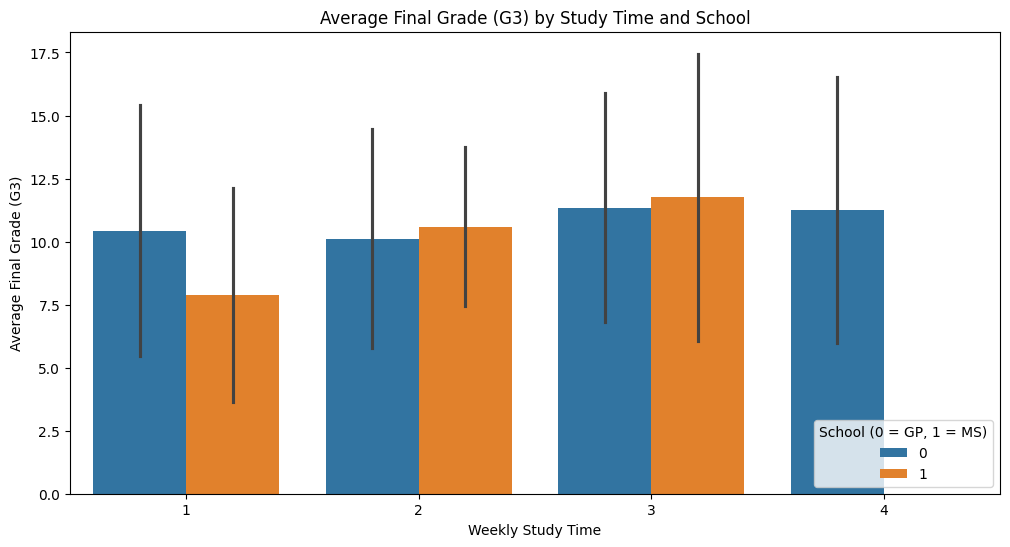

In [41]:
# I am using bar plot as it will show the average G3 grade for each study time level and school


plt.figure(figsize=(12, 6))
sns.barplot(data=df_cleaned, x="studytime", y="G3", hue="school_MS", errorbar="sd")
plt.title("Average Final Grade (G3) by Study Time and School")
plt.xlabel("Weekly Study Time")
plt.ylabel("Average Final Grade (G3)")
plt.legend(title="School (0 = GP, 1 = MS)")
plt.show()


-  Students in School MS benefit more from increased study hours, while School GP's students show little improvement in average grades with more study time. 

In [42]:
# Now lets check if grades have anything to do with other factors

In [46]:
health_effect_gp = df_cleaned[df_cleaned['school_MS'] == 0].groupby('health')['G3'].mean().idxmin()
health_effect_ms = df_cleaned[df_cleaned['school_MS'] == 1].groupby('health')['G3'].mean().idxmin()

In [48]:
print(f"In School GP, health doesn’t seem to hold them back. They’re unfazed!")
print(f"In School MS, students with the lowest health level ({health_effect_ms}) also have the lowest scores")

In School GP, health 0 doesn’t seem to hold them back. They’re unfazed!
In School MS, students with the lowest health level (0) also have the lowest scores


In [49]:
# Extra Credit

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

# Selecting features and target
X = df_cleaned[['studytime', 'absences', 'famsup', 'internet', 'health', 'higher', 'school_MS']]
y = df_cleaned['G3']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# The dataset was split into training (80%) and testing (20%) sets.

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the score
print("Model R^2 Score:", model.score(X_test, y_test))


Model R^2 Score: -0.06081522277181595


- The model returned an R2 score of approximately -0.06 on the test set,indicating that the model did not explain the variance in G3 well. This negative score suggests that a linear model might not be suitable for predicting grades based on the available features


### Conclusion
* School MS: Study time, health are significant factors affecting performance. Students in MS benefit from increased study hours
* School GP: Performance is less influenced by external factor (health), suggesting that students here might either have access to resources that minimize these dependencies or that school policies are less reliant on study time.
- Recommendations
* For School MS: Encourage consistent study hours and provide resources to support students lacking internet access or dealing with health issues.
* For School GP: Since performance is steady across study time and external factors, focus on internal resources like in-school tutoring and flexible learning environments.

- Future

* I would analyse other factors that I have kept in the df_cleaned. Internet access, family support, failures (past class failures), higher (aspiration for higher education), and more